![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)

___

#### NAME:

#### STUDENT ID:
___

## [Solutions] Homework - Data Visualization 

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set plot size
plt.rcParams['figure.figsize'] = (11,6) 

#### Data description

The following datasets are included with this notebook.

> Data, unit:
> **google_data.txt**
> - Modified [Julian Date](https://pypi.org/project/julian/)
> - Stock Value (USD)

> **ny_temps.txt**
> - Modified Julian Date
> - Stock Value (USD) 

> **yahoo_data.txt**
> - Modified Julian Date
> - Max Temp ($F^{\circ}$)

___

In [8]:
# load data
google_data = pd.read_csv('google_data.txt',sep="\t") # Note data seperator is a tab character (\t)
yahoo_data = pd.read_csv('yahoo_data.txt',sep="\t")
ny_temps = pd.read_csv('ny_temps.txt',sep='\t')

<br>

## Matplotlib - Graph Reproduction. 


Use your knowledge of Maplotlib, and any resources available to you, to try to reproduce the visualization that follows. Your plot doesn't have to be exactly perfect, but it should include the following:
> Three line plots each in a different color<br>
> The corresponding axis range(s) and labels<br>
> A horizontal grid associated with either Google's or Yahoo!'s stock value<br>
> A title and legend so that the visualization is understandable. 

**Note:** Feel free to make as many cells as you wish, and to use pythonic matplitlib if you wish.

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="solution_matplotlib_graph_reproducition.png" align="center" width="50%" padding="0px"><br>
    <br>
</div>

___

The following solutions use Pythonic Matplotlib and Seaborn. To learn more, see [here](https://matplotlib.org/3.1.0/gallery/misc/pythonic_matplotlib.html).

[Artist (Specification)](https://matplotlib.org/tutorials/intermediate/artists.html)
> Everything you can see on the figure is an **artist**, including Figure, Axes, Axis-objects, text-object, etc.<br>
> Most **artists** are tied to an **axes** -- an **artist** cannot be shared by, or moved from one to another, **axes**.<br>
> Can be declared/modified prior/after **axes**<br>
> Typical user will spend 95% of their time working with the **artists**. 


[Axes (Assembly)](https://matplotlib.org/api/axes_api.html)
> Actual plots<br>
> Each **axes** contains smaller objects such as tick marks, individual lines, legends, and text boxes.<br>
> Can be declared/modifed prior/after the **figure** is declared


[Figure (Display) ](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.figure.html)
> Outermost container for a matplotlib graphic.<br>
> Can contain multiple **axes** objects.<br>
> Must be declared prior to populating **axes**.

In [9]:
# load data
google_data = pd.read_csv('google_data.txt',sep="\t") # Note data seperator is a tab character (\t)
yahoo_data = pd.read_csv('yahoo_data.txt',sep="\t")
ny_temps = pd.read_csv('ny_temps.txt',sep='\t')

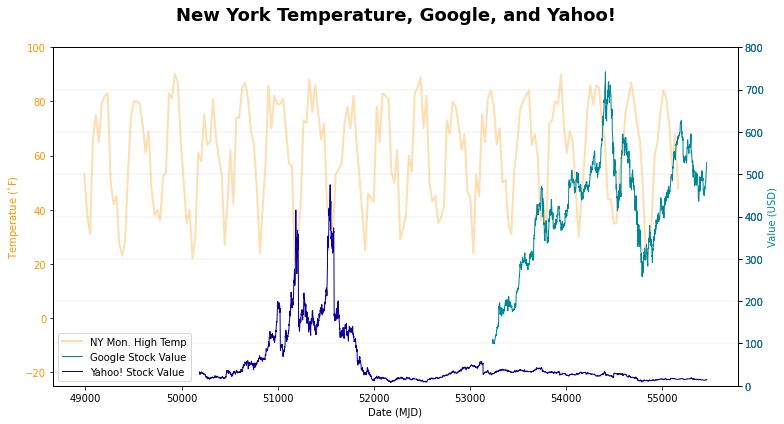

In [11]:
# instantiate figure and axes object(s)
fig, temp = plt.subplots()

#Create axes instance with an invisible x-axis and an independent y-axis 
yahoo = temp.twinx()  
google = temp.twinx() 

# ax.plot() returns a line object that we can assign to variables
# Note comma, in order to unpack tuple object
l1, = temp.plot(ny_temps['Modified Julian Date'], ny_temps['Max Temperature'], color='#FA9600', linestyle='-', label='NY Mon. High Temp', linewidth = 2.0, alpha=.3) 
l2, = google.plot(google_data['Modified Julian Date'], google_data['Stock Value'],color='#008796', label='Google Stock Value',linewidth = 1.0) 
l3, = yahoo.plot(yahoo_data['Modified Julian Date'], yahoo_data['Stock Value'],color='#0f0096', label='Yahoo! Stock Value',linewidth = 1.0) 

# declare range of x,y axis
temp.set_ylim(-25, 100)
google.set_ylim(0, 800)
yahoo.set_ylim(0, 800)

# set x,y labels
temp.set_xlabel("Date (MJD)")
temp.set_ylabel("Temperatue ($^{\circ}F$)", color=l1.get_color())
google.set_ylabel('Value (USD)', color=l2.get_color()) 

# set tick colorrs
temp.tick_params(axis='y', labelcolor=l1.get_color())
google.tick_params(axis='y', labelcolor=l2.get_color())
yahoo.tick_params(axis='y', labelcolor=l3.get_color())

# add grids bound to google
google.grid(linestyle=':', linewidth='0.3', color='gray')

# Add title
temp.set_title('New York Temperature, Google, and Yahoo!\n',fontweight='bold',fontsize=18) 

# make legend
lines = [l1, l2, l3]
temp.legend(handles=lines, labels=[l.get_label() for l in lines], loc='lower left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<br>

## Seaborn - Graph Reproduction. 


Now, try to reproduce the graph using the `Seaborn` library. Since temperature appars to have no influence on the stock values in the long run, **exclude the daily temperatures** from the Seaborn plot. Again, your plot doesn't have to be exactly perfect.

> `Seaborn` should have features which make the graph more appealing, both visually and quantitatively, as well as easier to plot.  Consider merging, grouping, or concatenating your data in order to plot multiple axes on the same figure.

In [12]:
# load librarires
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# set plot size
plt.rcParams['figure.figsize'] = (11,6) 

In [13]:
# load data
google_data = pd.read_csv('google_data.txt',sep="\t") # Note data seperator is a tab character (\t)
yahoo_data = pd.read_csv('yahoo_data.txt',sep="\t")
ny_temps = pd.read_csv('ny_temps.txt',sep='\t')

In [14]:
data = pd.concat([google_data.assign(dataset='Google Stock Value'), yahoo_data.assign(dataset='Yahoo! Stock Value')])
data.head()

,Modified Julian Date,Stock Value,dataset
0,55463,527.29,Google Stock Value
1,55462,513.48,Google Stock Value
2,55461,516.00,Google Stock Value
3,55460,513.46,Google Stock Value
4,55459,508.28,Google Stock Value


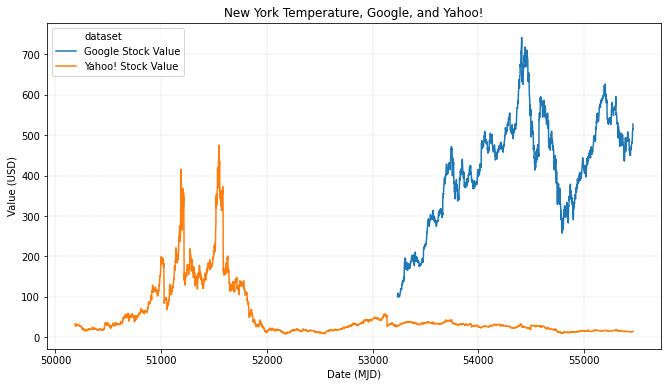

In [15]:
# two axes on same figure
sns.lineplot(x='Modified Julian Date', y='Stock Value', hue='dataset', data=data)

# modify artists
plt.ylabel("Value (USD)")
plt.xlabel("Date (MJD)")
plt.grid(linestyle=':', linewidth='0.3', color='gray')
plt.title("New York Temperature, Google, and Yahoo!") 

plt.show()

___

### Deliverables

Please submit your the following via the instructed method (lecture or Syllabus): 

>(1) A copy of your work, either a downloaded notebook or a pdf, by the assignment deadline

<br>

**Note:** Don't gorget to restart your kernel prior to extracting your data.

>```Kernel --> Restart Kernel and Run all Cells```<br>
>```File --> Export Notebooks As --> PDF``` (or as instructed)

___